In [344]:
# import the necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats

# for visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
%matplotlib inline

In [345]:
# load and read data file
'''inside the quotation is a filepath of the data file'''
dfuc = pd.read_csv(r'C:\Users\user\Downloads\Unicorn_Companies.csv') # ===> for csv file format # pd.read_excel(r'') ===> for  excel file format
dfuc

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group"
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures"
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners"
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capital, General Atlantic"
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital Investment Group, Matrix Partners China"
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, Northzone Ventures"


In [346]:
# view the shape of the data
dfuc.shape

(1074, 10)

- There are 1074 rows and 10 columns in the dataframe

In [347]:
# view info about the data
dfuc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [348]:
# view columns
dfuc.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [349]:
# view the summary statistics of the dataset
dfuc.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [350]:
# view the summary statistics of the dataset
dfuc.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group"
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures"
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners"
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capital, General Atlantic"


In [351]:
# Display the data types of the columns.
dfuc.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

# DATA CLEANING

In [352]:
# check for missing values or rows with NaN values
dfuc.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

- It can be noted that there are two columns with missing values.
- City has 16 missing values and Select Investor has 1 missing value.

In [353]:
dfuc[dfuc.City.isnull()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC Thomson Ventures"
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ventures"
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic Parcel Distribution"
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Ventures"
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DST Global"
880,bolttech,$1B,2021-07-01,Fintech,NaN,Singapore,Asia,2018,$210M,"Mundi Ventures, Doqling Capital Partners, Activant Capital"


In [354]:
dfuc[dfuc['Select Investors'].isnull()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN


In [355]:
CountrytoCity = {'Singapore': 'Singapore',
                        'Hong Kong': 'Hong Kong',
                        'Bahamas' : 'Nassau'
}
# Replace the NaN values in the 'City' column with the corresponding city names
dfuc['City'] = dfuc.apply(lambda row: CountrytoCity[row['Country']] if pd.isna(row['City']) else row['City'], axis=1)


In [356]:
dfuc[dfuc.City.isnull()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors


- In this code, we first define a dictionary 'Country_City_Mapping' that maps each country to its corresponding city name. 
We then use the 'apply()' method on the DataFrame to replace the NaN values in the 'City' column with the corresponding city name based on the 'Country' column. The 'apply()' method applies a function to each row of the DataFrame, and we use a lambda function that checks if the 'City' value is NaN. If it is NaN, 
we replace it with the corresponding city name from the 'Country_City_Mapping' dictionary based on the 'Country' value. 
If it is not NaN, we leave it unchanged.

In [357]:
# Drop all rows with null values in the 'Select Investors' column
dfuc.dropna(subset=['Select Investors'], inplace=True)

Data Description
- Company:	Company name
- Valuation:	Company valuation in billions (B) of dollars
- Date Joined:	The date in which the company reached $1 billion in valuation
- Industry:	Company industry
- City:	City the company was founded in
- Country:	Country the company was founded in
- Continent:	Continent the company was founded in
- Year Founded:	Year the company was founded
- Funding:	Total amount raised across all funding rounds in billions (B) or millions (M) of dollars
- Select Investors:	Top 4 investing firms or individual investors (some have less than 4)


In [358]:
#To remove duplicate values 
dfuc = dfuc.drop_duplicates()

In [359]:
dfuc['Valuation'] = dfuc['Valuation'].str.replace('$', '')  # Remove the '$' symbol
dfuc['Valuation'] = dfuc['Valuation'].str.replace('B', '')  # Remove the 'B' character
dfuc['Valuation'] = dfuc['Valuation'].astype(float)  # Convert to float

C:\Users\user\AppData\Local\Temp\ipykernel_31904\1615857092.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [360]:
# Replace 'Unknown' and 'N/A' values with 0
dfuc['Funding'] = dfuc['Funding'].replace(['Unknown', 'N/A'], 0)

# Rename the 'Valuation' and 'Funding' columns
dfuc = dfuc.rename(columns={'Valuation': 'Valuation ($B)'})

In [361]:
# Cleaning the Date Joined column
dfuc["Date Joined"] = pd.to_datetime(dfuc["Date Joined"])

# Creating a TotalYearsToJoin column to help calculate how long it takes for a company to become a unicorn?
dfuc["TotalYearsToJoin"] = dfuc["Date Joined"].dt.year - dfuc["Year Founded"]

dfuc.head()

,Company,Valuation ($B),Date Joined,Industry,City,...,Continent,Year Founded,Funding,Select Investors,TotalYearsToJoin
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,...,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",5
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,...,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures",10
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,...,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners",10
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,...,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,...,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capital, General Atlantic",6


In [362]:
dfuc.Country.unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Bahamas', 'India', 'Indonesia', 'Turkey', 'Estonia', 'Germany',
       'Hong Kong', 'South Korea', 'Mexico', 'Canada', 'Netherlands',
       'France', 'Finland', 'Israel', 'Lithuania', 'Denmark', 'Belgium',
       'Colombia', 'Brazil', 'Singapore', 'Austria', 'Ireland',
       'United Arab Emirates', 'Switzerland', 'Vietnam', 'South Africa',
       'Thailand', 'Norway', 'Chile', 'Argentina', 'Bermuda', 'Japan',
       'Spain', 'Malaysia', 'Senegal', 'Philippines', 'Luxembourg',
       'Nigeria', 'Czech Republic', 'Croatia', 'Italy'], dtype=object)

In [363]:
dfuc.dtypes

Company                     object
Valuation ($B)             float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
TotalYearsToJoin             int64
dtype: object

In [364]:
# Insight 1
# Which countries have the most unicorns?
dfuc.Country.value_counts().head(20)

United States     562
China             172
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
Singapore          12
South Korea        12
Australia           8
Hong Kong           6
Mexico              6
Indonesia           6
Netherlands         6
Sweden              6
Switzerland         5
Japan               5
Ireland             5
Name: Country, dtype: int64

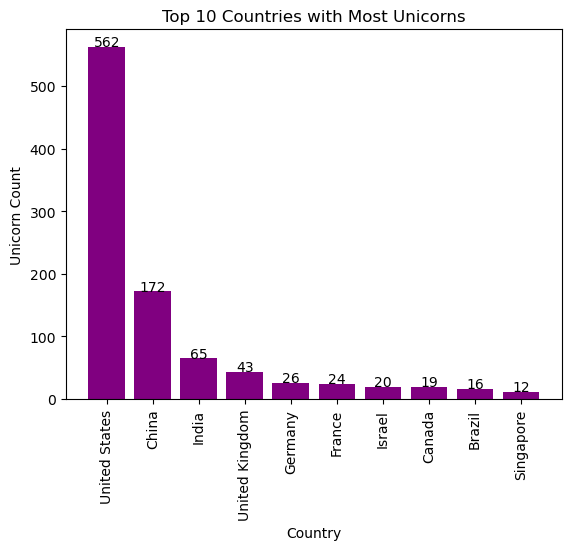

In [365]:
# Pictorial representation of Countries with the most Unicorn
unicorncount = dfuc['Country'].value_counts()[:10]

# Plot bar chart of unicorn count by country
plt.bar(x=unicorncount.index, height=unicorncount.values, color='purple')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Unicorn Count')
plt.title('Top 10 Countries with Most Unicorns')

# Add data labels to the bar chart
for i, v in enumerate(unicorncount.values):
    plt.text(i, v+1, str(v), ha='center')

plt.show()


- Based on the exploratory data analysis, we can observe that the United States has the highest number of unicorns with 562 companies, followed by China with 172 companies and India with 65 companies. The top 20 countries with the most unicorns are dominated by the United States and China, which together account for more than two-thirds of all unicorns in the world.

- We can also see that Israel, Canada, Brazil, and South Korea have a significant number of unicorns, with 20, 19, 16, and 12 companies respectively. The remaining countries in the top 20 have between 5 to 8 unicorns.These findings suggest that the United States and China are the leading countries in terms of unicorn creation, with a highly concentrated distribution of unicorns among a few countries. This information can be useful for investors, entrepreneurs, and policymakers who are interested in the startup ecosystem and want to identify potential investment or collaboration opportunities.

- However, it is important to note that this analysis is based on a single dataset and may not represent the entire startup ecosystem. Further analysis and data collection may be necessary to draw more robust conclusions.

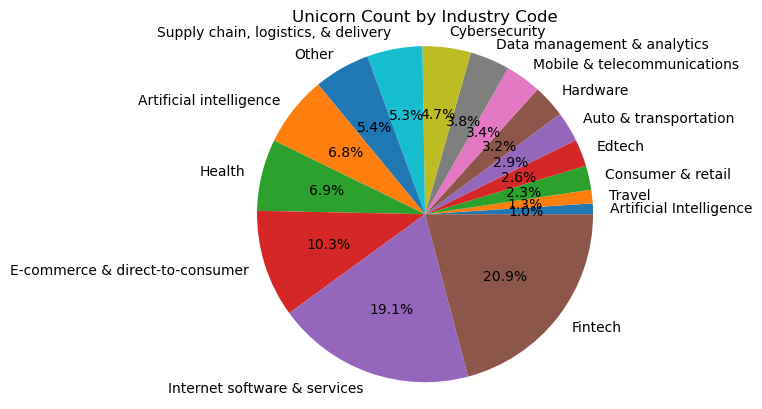

In [366]:
# Insight 2 to show which industry has the most unicorn companies
import matplotlib.pyplot as plt

# Group the dataframe by industry code and count the number of unicorns
dfuc_count = dfuc.groupby('Industry').size().reset_index(name='Count').sort_values('Count')

# Create a pie chart of unicorn count by industry code
plt.pie(dfuc_count['Count'], labels=dfuc_count['Industry'], autopct='%1.1f%%')
plt.title('Unicorn Count by Industry Code')
plt.axis('equal')
plt.show()

- 20.9% of the Unicorn startups are Fintech. Financial technology is the technology and innovation that aims to compete with traditional financial methods in the delivery of financial services. It is an emerging industry that uses technology to improve activities in finance.

- AI-based startup unicorn startups are 6.8%. Health-based is 6.89%. Cybersecurity-based is 4.66%. Data management and analytics is 3.82%. I am specifying only these four startup unicorns because these sectors are the future.

In [368]:
# Insight 3
# Arranging the company based on Valuation showing the Top ten comoanies based on their valuations
company_wise_Valuation = dfuc.sort_values(by="Valuation ($B)", ascending=False)
company_wise_Valuation.head(10)

,Company,Valuation ($B),Date Joined,Industry,City,...,Continent,Year Founded,Funding,Select Investors,TotalYearsToJoin
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,...,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",5
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,...,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures",10
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,...,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners",10
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,...,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,...,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capital, General Atlantic",6
5,Canva,40.0,2018-01-08,Internet software & services,Surry Hills,...,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Matrix Partners",6
6,Checkout.com,40.0,2019-05-02,Fintech,London,...,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST Global",7
7,Instacart,39.0,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,...,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & Byers, Collaborative Fund",2
8,JUUL Labs,38.0,2017-12-20,Consumer & retail,San Francisco,...,North America,2015,$14B,Tiger Global Management,2
9,Databricks,38.0,2019-02-05,Data management & analytics,San Francisco,...,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates, Battery Ventures",6


- In the dataset we have, the Bytedance from China is the most valued startup with a total valuation of 180B dollars. SpaceX is the second most valued startup with a valuation of 100B dollars. SpaceX Joined the unicorn club in 2012.

C:\Users\user\AppData\Local\Temp\ipykernel_31904\1817537185.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



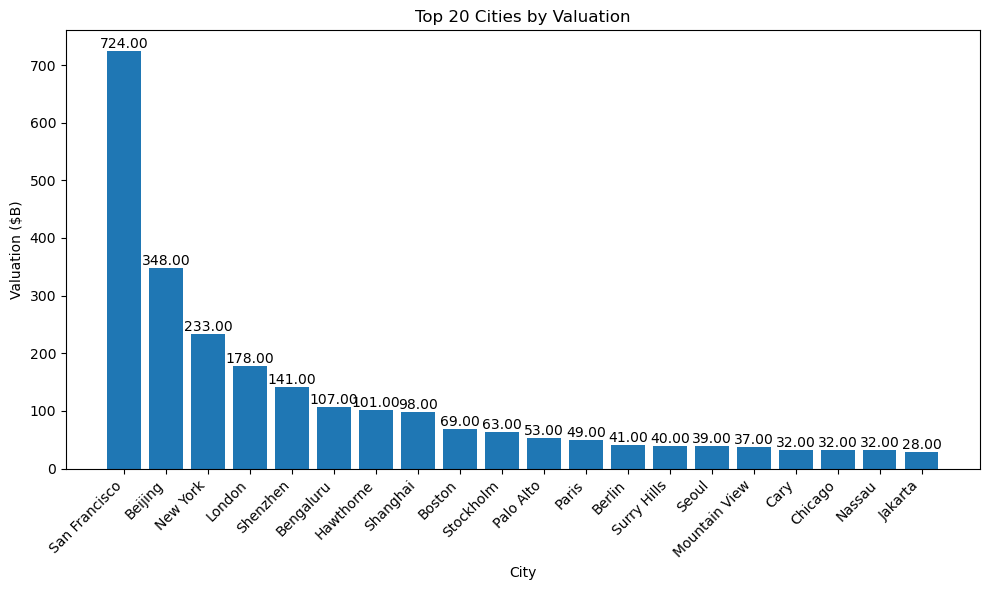

In [382]:
# Insight 4
# Get the city with the most valuation of the startup company and show cities that appear to be industry hubs
top_20_cities = dfuc.groupby('City').sum().sort_values(by='Valuation ($B)', ascending=False).head(20)
top_20_cities = top_20_cities.reset_index()

plt.figure(figsize=(10, 6))

colors = ["#B21236", "#723240", "#FE8826", "#FEB914", "#2C9FA2", "#002C2B", "#275A75", "#0376B3", "#B3039E"]
bars = plt.bar(top_20_cities['City'], top_20_cities['Valuation ($B)'], color=colors)

# Add values inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')
    
# Create a bar chart of the valuation by city
plt.bar(x['City'], x['Valuation ($B)'])
plt.xlabel('City')
plt.ylabel('Valuation ($B)')
plt.title('Top 20 Cities by Valuation')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Show the bar chart
plt.show()

- San Francisco tops the chart with a total valuation of 724B dollars. San Francisco has produced the most unicorn startups with a total valuation of more than 700B dollars. London is at 4th position in the last with a total valuation of 178B dollars.

In [383]:
# Top 15 city with most Unicorn Startups
dfuc.City.value_counts().head(20)

San Francisco    152
New York         103
Beijing           63
Shanghai          43
London            34
Bengaluru         29
Shenzhen          19
Paris             19
Palo Alto         18
Berlin            17
Boston            16
Chicago           16
Hangzhou          16
Mountain View     16
Singapore         12
Sao Paulo         11
San Mateo         11
Tel Aviv          11
Seoul             10
Redwood City      10
Name: City, dtype: int64

- As expected, San Francisco City has the highest number of Unicorn Startups. London has 34. New York has 103.

In [384]:
# Insight 5
# Country-based Unicorn Startups
dfuc[dfuc.Country=='United States'][['Company','Valuation ($B)','Industry','Date Joined']].head(20)

,Company,Valuation ($B),Industry,Date Joined
1,SpaceX,100.0,Other,2012-12-01
3,Stripe,95.0,Fintech,2014-01-23
7,Instacart,39.0,"Supply chain, logistics, & delivery",2014-12-30
8,JUUL Labs,38.0,Consumer & retail,2017-12-20
9,Databricks,38.0,Data management & analytics,2019-02-05
11,Epic Games,32.0,Other,2018-10-26
13,Fanatics,27.0,E-commerce & direct-to-consumer,2012-06-06
14,Chime,25.0,Fintech,2019-03-05
18,Miro,18.0,Internet software & services,2022-01-05
21,Discord,15.0,Internet software & services,2018-04-20


- This is the List of Unicorn Startups from United States. SpaceX tops the chart with a valuation of $100B. It joins the unicorn list in the year 2012. There are plenty of other companies from different industries which you can look for like, Stripe, Discord, Stripe, Grammarly and many others.

In [385]:
# Insight 6
#To find out the number of companies founded each year
#Display each unique year that occurs in the dataset along with the number of companies that were founded in each unique year.
dfuc["Year Founded"].value_counts().sort_values(ascending=False)

2015    155
2016    110
2014    109
2012     95
2013     86
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1992      1
1993      1
1990      1
1984      1
1996      1
1979      1
1991      1
1919      1
1997      1
Name: Year Founded, dtype: int64

- 2015 has the highest count. This indicates that 2015 is the year when the largest number of companies in this dataset were founded.

C:\Users\user\AppData\Local\Temp\ipykernel_31904\376802246.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




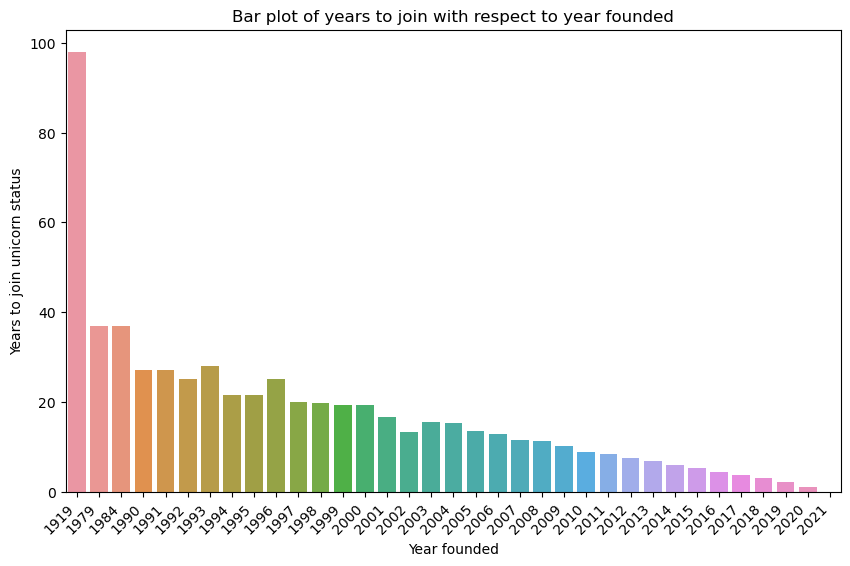

In [403]:
 # Insight 4
# Visualization of the time it took companies to reach unicorn status
 
 # Set the size of the plot.
plt.figure(figsize=(10,6))


# Create bar plot to visualize the average number of years it took companies to reach unicorn status 
# with respect to when they were founded.
# Plot data from the `companies` DataFrame.
sns.barplot(x=dfuc["Year Founded"], y=dfuc["TotalYearsToJoin"], ci=False)


# Set title
plt.title("Bar plot of years to join with respect to year founded")

    
# Set x-axis label
plt.xlabel("Year founded")


# Set y-axis label
plt.ylabel("Years to join unicorn status")


# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(rotation=45, ha='right')

# Display the plot.
plt.show()

In [392]:
# split the column into year, month and day
dfuc['Joined Year'] = dfuc['Date Joined'].dt.year
dfuc['Joined Month'] = dfuc['Date Joined'].dt.strftime('%B')
dfuc['Joined Day']=dfuc['Date Joined'].dt.day

dfuc.head()

,Company,Valuation ($B),Date Joined,Industry,City,...,Select Investors,TotalYearsToJoin,Joined Year,Joined Month,Joined Day
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,...,"Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group",5,2017,April,7
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,...,"Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures",10,2012,December,1
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,...,"Tiger Global Management, Sequoia Capital China, Shunwei Capital Partners",10,2018,July,3
3,Stripe,95.0,2014-01-23,Fintech,San Francisco,...,"Khosla Ventures, LowercaseCapital, capitalG",4,2014,January,23
4,Klarna,46.0,2011-12-12,Fintech,Stockholm,...,"Institutional Venture Partners, Sequoia Capital, General Atlantic",6,2011,December,12


In [394]:
 # Insight 5
# year most companies joined
year_unicorn = dfuc.groupby('Joined Year')['Company'].count().sort_values(ascending = False)
print(year_unicorn)

Joined Year
2021    520
2022    116
2020    108
2019    104
2018    103
2017     44
2015     34
2016     21
2014     13
2012      4
2013      3
2011      2
2007      1
Name: Company, dtype: int64


In [395]:
 # Insight 6
#  Average number of years it takes a company to become a unicorn?
# creating a separate column to find the difference between Joined year and Year founded. 
dfuc['Year to unicorn'] = dfuc['Joined Year'] - dfuc['Year Founded']

# finding the average number of years
avgyearstobcmaunicorn = dfuc['Year to unicorn'].mean().astype('int')
print('The average number of years it takes a company to become a unicorn is: ', avgyearstobcmaunicorn)

The average number of years it takes a company to become a unicorn is:  7


In [396]:
 # Insight 6
#How long does it usually take for a company to become a unicorn? Has it always been this way?
count_10 = ((dfuc['Year to unicorn'] >= 0) & (dfuc['Year to unicorn'] <= 10)).sum()
count_20 = ((dfuc['Year to unicorn'] >= 11) & (dfuc['Year to unicorn'] <= 20)).sum()
count_50 = ((dfuc['Year to unicorn'] >= 21) & (dfuc['Year to unicorn'] <= 50)).sum()
print('Number of companies between 0 to 10 years: ', count_10)
print('Number of companies between 10 to 20 years: ', count_20)
print('Number of companies between 21 to 50 years: ', count_50)

Number of companies between 0 to 10 years:  911
Number of companies between 10 to 20 years:  140
Number of companies between 21 to 50 years:  20


In [407]:
 # Insight 7
# Which investors have funded the most unicorns?
# Count unicorns by investor
investor_counts = dfuc['Select Investors'].str.split(',', expand=True).stack().value_counts()

# Display top 5 investors by number of unicorns funded
top5_investors = investor_counts.head(5)
print(top_5)

 Tiger Global Management    39
 Accel                      32
 Sequoia Capital            30
Sequoia Capital China       30
Andreessen Horowitz         29
dtype: int64


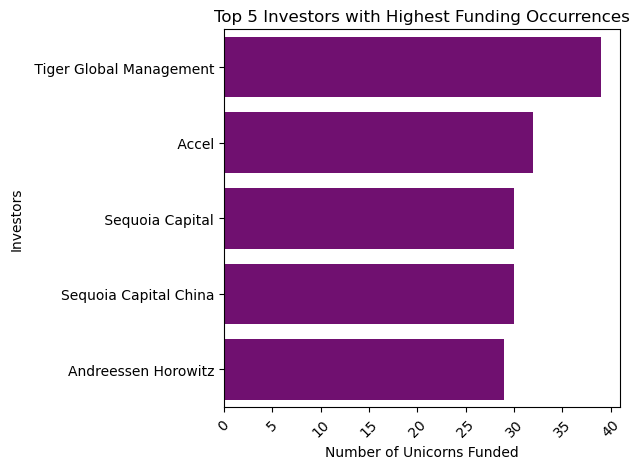

In [410]:
# Step 4: Plot a bar chart to visualize the top 5 investors
# Create bar chart of top 10 investors
sns.barplot(x=top_5.values, y=top_5.index, color = 'purple')
plt.xlabel('Number of Unicorns Funded')
plt.ylabel('Investors')
plt.title('Top 5 Investors with Highest Funding Occurrences')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation:
- The top 5 investors include: Tiger Global Management,Accel, Sequoia Capital and Sequoia Capital China and Andreessen Horowitz with Tiger Global Management having funded the most unicorn companies to the tune of 39.

         Company    ROI
0      Bytedance  172.0
2          SHEIN   98.0
1         SpaceX   93.0
3         Stripe   93.0
4         Klarna   42.0
6   Checkout.com   38.0
7      Instacart   36.0
9     Databricks   35.0
10       Revolut   31.0
12           FTX   30.0


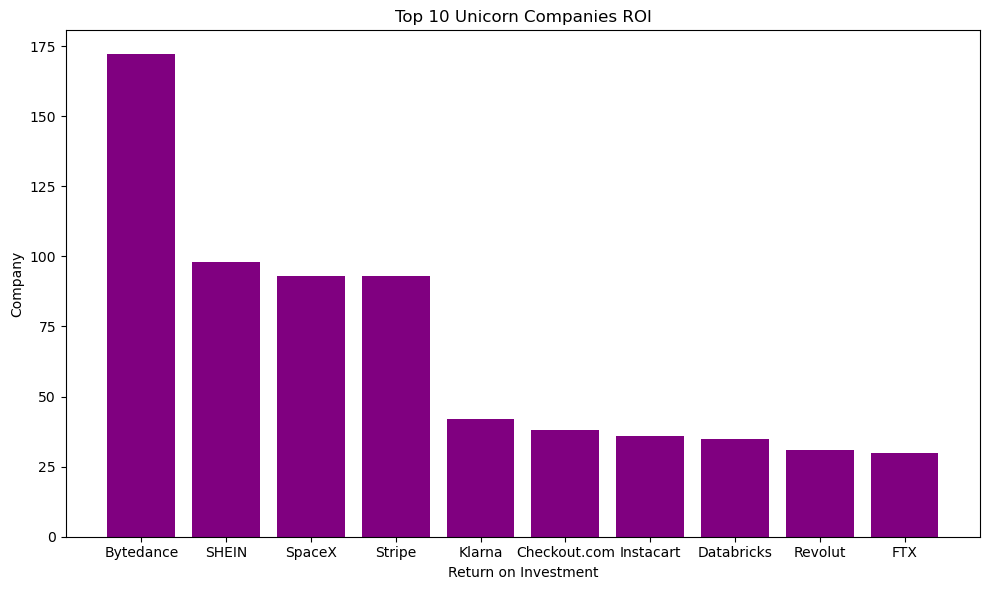

In [417]:
 # Insight 8
# Calculate the ROI for each company
dfuc['ROI'] = (dfuc['Valuation ($B)'] - dfuc['Funding'])

# Sort the companies based on ROI in descending order
dfuc = dfuc.sort_values('ROI', ascending=False).head(10)

# Print the top 10 companies with the highest ROI
print(dfuc[['Company', 'ROI']].head(10))

plt.figure(figsize=(10, 6))
plt.bar(dfuc['Company'], dfuc['ROI'], color='purple')
plt.xlabel('Return on Investment')
plt.ylabel('Company')
plt.title('Top 10 Unicorn Companies ROI')

# Display the chart
plt.tight_layout()
plt.show()

- Bytedance had the most return on investment out of the unicorn companies followed by shein,spaceX, 
and stripe closely following each other.

My Observations are:
- There are 1074 unicorn companies represented in this dataset
- Unicorn companies are companies that have all achieved great success in their respective industries, and they are seen as leaders in the future of technology. Unicorn companies are often characterized by their innovative business models, their rapid growth, and their ability to attract top talent.

- It takes an average of 7 years to become a unicorn and the most valued Industry are Fintech companies.

- The most valuable unicorn company from this dataset is Bytedance which is valued at 180 Billion Dollars; it is important to note that a company needs to be valued at $1B to be considered a unicorn.

- United States has 562 unicorn companies which makes it the largest country in the world with unicorn companies and it is almost triple the size of china unicorn companies which comes after US. 

- San Francisco is a good city to start a company as it is an industry hub with a total of 152 unicorn companies to a value of 724b followed by New York with 103 unicorn companies and Beijing and Shanghai having 63 and 43 unicorn companies respectively.


Recommendations
1. Focus on companies founded after 2010 as they have higher growth potential 

2. Prioritize companies with over $500 million in funding as a proxy for growth  

3. Invest in companies with experienced leadership teams (age >40)

4. Diversify portfolio with companies across categories like Ecommerce, Fintech etc.

5. Focus on product development. The best way to improve your business is to focus on developing products that your customers love. This means understanding your customers' needs and pain points, and then developing products that solve those problems.

6. Another way to grow your business is through acquisitions. This means buying smaller companies that are in related industries. This can be a good way to enter new markets, acquire new customers, and gain new skills and technologies
